In [1]:
"""
install the upgraded givernylocal library.
    - n.b. this only needs to be run once.
"""
!pip install --upgrade givernylocal

<hr style = "height:6px;border:none;background-color:sienna">

<h2 style = "font-weight:bold;font-style:italic">
    Getcutout demo notebook
</h2>

<p style = "font-weight:bold;font-size:13px">
    &emsp;n.b. requires python 3.9+
</p>

<p style = "font-weight:bold;font-size:13px">
    <u>purpose</u> :
    <br>
    &emsp;- local processing of JHTDB datasets.
    <br><br>
    <u>supported datasets</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        isotropic1024coarse &ensp;: &ensp;isotropic 1024-cube (coarse).
    </li>
    <li style = "font-weight:bold;font-size:13px">
        isotropic1024fine &ensp;: &ensp;isotropic 1024-cube (fine).
    </li>
    <li style = "font-weight:bold;font-size:13px">
        isotropic4096 &ensp;: &ensp;isotropic 4096-cube.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        isotropic8192 &ensp;: &ensp;isotropic 8192-cube.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        isotropic32768 &ensp;: &ensp;isotropic 32768-cube.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        sabl2048low &ensp;: &ensp;stable atmospheric boundary layer 2048-cube, low-rate timestep.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        sabl2048high &ensp;: &ensp;stable atmospheric boundary layer 2048-cube, high-rate timestep.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        stsabl2048low &ensp;: &ensp;strong stable atmospheric boundary layer 2048-cube, low-rate timestep.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        stsabl2048high &ensp;: &ensp;strong stable atmospheric boundary layer 2048-cube, high-rate timestep.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        rotstrat4096 &ensp;: &ensp;rotating stratified 4096-cube.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        mhd1024 &ensp;: &ensp;magneto-hydrodynamic isotropic 1024-cube.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        mixing &ensp;: &ensp;homogeneous buoyancy driven 1024-cube.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        channel &ensp;: &ensp;channel flow.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        channel5200 &ensp;: &ensp;channel flow (reynolds number 5200).
    </li>
    <li style = "font-weight:bold;font-size:13px">
        transition_bl &ensp;: &ensp;transitional boundary layer.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        diurnal_windfarm &ensp;: &ensp;diurnal windfarm.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        nbl_windfarm &ensp;: &ensp;neutral boundary layer windfarm.
    </li>
</ul>

<p style = "font-weight:bold;font-size:13px">
    <u>functions</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        getCutout &ensp;: &ensp;read data for a user-specified box.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        write_cutout_hdf5_and_xmf_files &ensp;: &ensp;write getCutout results to .h5 and .xmf files.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        cutout_values &ensp;: &ensp;see values for specific point(s) in the getCutout data.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        contour_plot &ensp;: &ensp;create a contour plot of getCutout data.
    </li>
</ul>

<hr style = "height:6px;border:none;background-color:sienna">

<h4 style = "font-weight:bold;font-style:italic">
    instantiate dataset
</h4>

<p style = "font-weight:bold;font-size:13px">
    <u>purpose</u> : 
    <br>
    &emsp;- instantiate the dataset and cache the metadata.
    <br>

</p>

<p style = "font-weight:bold;font-size:13px">
    <u>parameters</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        auth_token &ensp;: &ensp;turbulence user authorization token.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        dataset_title &ensp;: &ensp;name of the turbulence dataset.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        output_path &ensp;: &ensp;folder path where output files will be to saved to.
        <br>
        &emsp;- n.b. &ensp;: &ensp;cannot be left blank.
    </li>
</ul>

<hr style = "height:6px;border:none;background-color:sienna">

In [2]:
from givernylocal.turbulence_dataset import turb_dataset
from givernylocal.turbulence_toolkit import getCutout, write_cutout_hdf5_and_xmf_files

# keep these same as your demo notebook style
auth_token = "edu.jhu.pha.turbulence.testing-201406"
output_path = "./giverny_output"

# IMPORTANT: dataset must be an OBJECT, not a string
dataset = turb_dataset(dataset_title="channel5200", output_path=output_path, auth_token=auth_token)

print("Dataset object ready:", type(dataset))
print("Dataset title:", dataset.dataset_title)


Dataset object ready: <class 'givernylocal.turbulence_dataset.turb_dataset'>
Dataset title: channel5200


<hr style = "height:6px;border:none;background-color:sienna">

<h4 style = "font-weight:bold;font-style:italic">
    getCutout
</h4>

<p style = "font-weight:bold;font-size:13px">
    <u>purpose</u> : 
    <br>
    &emsp;- retrieve the user-requested box.
    <br>
</p>

<p style = "font-weight:bold;font-size:13px">
    <u>steps</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        step 1 &ensp;: &ensp;identify the database files to be read.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        step 2 &ensp;: &ensp;read the database files and store the data in a matrix.
    </li>
</ul>

<p style = "font-weight:bold;font-size:13px">
    <u>parameters</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        x_range, y_range, z_range &ensp;: &ensp;axes ranges defining the box for which data values will be read.
        <br>
        &emsp;- specify each axis range as [minimum, maximum].
    </li>
    <li style = "font-weight:bold;font-size:13px">
        x_stride, y_stride, z_stride &ensp;: &ensp;axes strides, i.e. the number of points between each step along the axes.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        variable &ensp;: &ensp;type of data.
        <br>
        &emsp;- vectors &ensp;: &ensp;velocity, vectorpotential, magneticfield, force.
        <br>
        &emsp;- scalars &ensp;: &ensp;pressure, temperature, soiltemperature, sgsenergy, sgsviscosity, density.
        <br>
    </li>
    <li style = "font-weight:bold;font-size:13px">
        time &ensp;: &ensp;snapshot number.
    </li>
</ul>

<p style = "font-weight:bold;font-size:13px">
    <u>output</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        result &ensp;: &ensp;matrix corresponding to variable at time in axes_ranges with strides.
    </li>
</ul>

<hr style = "height:6px;border:none;background-color:sienna">

In [3]:
import numpy as np
import time as time_mod  # rename so we don't confuse it with "timepoint"

# ---- your choices ----
variable  = "velocity"
timepoint = 1

y_range = [1, 16]
t_range = [timepoint, timepoint]   # time is a RANGE now: [start, end]
stride  = [1, 1, 1, 1]             # x, y, z, t strides

def fetch_and_save(x_range, y_range, z_range, t_range, sleep_s=0.3):
    """
    Download one cutout and save it as .h5 + .xmf.
    All ranges must be [start, end].
    """

    # Pack ranges as XYZT (this matches your current getCutout signature)
    xyzt_ranges  = np.array([x_range, y_range, z_range, t_range], dtype=int)
    xyzt_strides = np.array([1, 1, 1, 1], dtype=int)
    # 1) Download
    res = getCutout(dataset, variable, xyzt_ranges, xyzt_strides, verbose=False)

    # 2) Create a clean filename (NO folder here)
    xs, xe = x_range
    ys, ye = y_range
    zs, ze = z_range
    ts, te = t_range

    fname = f"ch5200_T{ts}_X{xs:04d}-{xe:04d}_Y{ys:04d}-{ye:04d}_Z{zs:04d}-{ze:04d}_vel"

    # 3) Save (library will put it into its default output folder)
    write_cutout_hdf5_and_xmf_files(dataset, res, fname)

    print("Saved:", fname)

    # small pause so we don't spam the server
    time_mod.sleep(sleep_s)


# ---------- your “10 cutouts” plan ----------
x_starts = [1, 100, 200, 300, 400]     # vary X
z_starts = [1, 100, 200, 300, 400]     # vary Z

# A) vary X, keep Z fixed
z_fixed = [1, 16]
for xs in x_starts:
    fetch_and_save([xs, xs + 15], y_range, z_fixed, t_range)

# B) vary Z, keep X fixed
x_fixed = [1, 16]
for zs in z_starts:
    fetch_and_save(x_fixed, y_range, [zs, zs + 15], t_range)

print("Done: batch cutouts saved.")


writing the cutout .h5 and .xmf files...

files written successfully.
-----
Saved: ch5200_T1_X0001-0016_Y0001-0016_Z0001-0016_vel
writing the cutout .h5 and .xmf files...

files written successfully.
-----
Saved: ch5200_T1_X0100-0115_Y0001-0016_Z0001-0016_vel
writing the cutout .h5 and .xmf files...

files written successfully.
-----
Saved: ch5200_T1_X0200-0215_Y0001-0016_Z0001-0016_vel
writing the cutout .h5 and .xmf files...

files written successfully.
-----
Saved: ch5200_T1_X0300-0315_Y0001-0016_Z0001-0016_vel
writing the cutout .h5 and .xmf files...

files written successfully.
-----
Saved: ch5200_T1_X0400-0415_Y0001-0016_Z0001-0016_vel
writing the cutout .h5 and .xmf files...

files written successfully.
-----
Saved: ch5200_T1_X0001-0016_Y0001-0016_Z0001-0016_vel
writing the cutout .h5 and .xmf files...

files written successfully.
-----
Saved: ch5200_T1_X0001-0016_Y0001-0016_Z0100-0115_vel
writing the cutout .h5 and .xmf files...

files written successfully.
-----
Saved: ch5200_

In [4]:
import inspect
import givernylocal
from givernylocal.turbulence_toolkit import getCutout

print("givernylocal version:", getattr(givernylocal, "__version__", "unknown"))
print("getCutout signature:", inspect.signature(getCutout))
print("getCutout file:", inspect.getfile(getCutout))


givernylocal version: unknown
getCutout signature: (cube, var, xyzt_axes_ranges_original, xyzt_strides, trace_memory=False, verbose=True)
getCutout file: D:\PyCharm\.venv\Lib\site-packages\givernylocal\turbulence_toolkit.py


In [5]:
print("result exists?", "result" in globals())
print("res exists?   ", "res" in globals())


result exists? False
res exists?    False


<hr style = "height:6px;border:none;background-color:sienna">

<h4 style = "font-weight:bold;font-style:italic">
    save cutout results
</h4>

<p style = "font-weight:bold;font-size:13px">
    <u>purpose</u> : 
    <br>
    &emsp;- save the cutout retrieved by the getCutout function.
    <br>
</p>

<p style = "font-weight:bold;font-size:13px">
    <u>parameters</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
         dataset &ensp;: &ensp;the instantiated dataset.
    </li>
    <li style = "font-weight:bold;font-size:13px">
         result &ensp;: &ensp;output from getCutout.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        output_filename &ensp;: &ensp;filename for the hdf5 and xmf files to be saved in the output_path folder (default is the dataset name).
    </li>
</ul>

<p style = "font-weight:bold;font-size:13px">
    <u>output</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        hdf5, xmf files &ensp;: &ensp;saved to output_filename in the output_path folder.
    </li>
</ul>

<hr style = "height:6px;border:none;background-color:sienna">

In [6]:
import numpy as np

# --- pick ONE cutout to download + save ---
variable = "velocity"
timepoint = 1

x_range = [100, 115]
y_range = [1, 16]
z_range = [1, 16]
t_range = [timepoint, timepoint]   # important: time is a RANGE

# build XYZT ranges (what your current getCutout expects)
xyzt_ranges  = np.array([x_range, y_range, z_range, t_range], dtype=int)
xyzt_strides = np.array([1, 1, 1, 1], dtype=int)

# download
cutout = getCutout(dataset, variable, xyzt_ranges, xyzt_strides, verbose=False)

# save (do NOT prepend "giverny_output" here because Cell 3 already set output_path)
xs, xe = x_range
ys, ye = y_range
zs, ze = z_range
fname = f"ch5200_T{timepoint}_X{xs:04d}-{xe:04d}_Y{ys:04d}-{ye:04d}_Z{zs:04d}-{ze:04d}_vel"

write_cutout_hdf5_and_xmf_files(dataset, cutout, fname)
print("Saved:", fname)


writing the cutout .h5 and .xmf files...

files written successfully.
-----
Saved: ch5200_T1_X0100-0115_Y0001-0016_Z0001-0016_vel


In [7]:
from pathlib import Path

# pick a folder that actually exists
folder = Path("giverny_output") if Path("giverny_output").exists() else Path("giverny_output")

# look for h5 files (velocity files too)
files = sorted(folder.glob("*.h5"))

print("Looking in:", folder.resolve())
print("Found .h5 files:", len(files))

if len(files) == 0:
    print("No .h5 files found here.")
    print("Tip: check where you saved your cutouts, or search with: folder.rglob('*.h5')")
else:
    latest = files[-1]
    print("Latest file:", latest)


Looking in: D:\PyCharm\giverny_output
Found .h5 files: 9
Latest file: giverny_output\ch5200_T1_X0400-0415_Y0001-0016_Z0001-0016_vel.h5


In [8]:
from pathlib import Path
import h5py

# Try a few common folders (add your own if needed)
candidates = [
    Path("giverny_output"),
    Path("giverny_output"),
    Path("data"),          # sometimes people save here
]

files = []
picked_folder = None

for folder in candidates:
    if folder.exists():
        vel_files = sorted(folder.glob("*_vel.h5"))
        if len(vel_files) > 0:
            files = vel_files
            picked_folder = folder
            break

print("Searched folders:", [str(p) for p in candidates])
print("Picked folder:", picked_folder)
print("Found velocity files:", len(files))

if len(files) == 0:
    raise FileNotFoundError(
        "No '*_vel.h5' files found in the searched folders. "
        "Your cutouts are saved somewhere else (or not saved yet)."
    )

latest_vel = files[-1]
print("Latest velocity file:", latest_vel)

with h5py.File(latest_vel, "r") as f:
    print("Keys:", list(f.keys()))
    for k in f.keys():
        if hasattr(f[k], "shape"):
            print(k, f[k].shape, f[k].dtype)


Searched folders: ['giverny_output', 'giverny_output', 'data']
Picked folder: giverny_output
Found velocity files: 9
Latest velocity file: giverny_output\ch5200_T1_X0400-0415_Y0001-0016_Z0001-0016_vel.h5
Keys: ['zcoor', 'values', 'ycoor', 'xcoor', 'velocity_0001']
zcoor (16,) float64
values (3,) >f4
ycoor (16,) float64
xcoor (16,) float64
velocity_0001 (16, 16, 16, 3) float32


In [9]:
from pathlib import Path

vel_files = sorted(Path(".").rglob("*_vel.h5"))

print("Total '*_vel.h5' found:", len(vel_files))
for p in vel_files[:30]:
    print(p)


Total '*_vel.h5' found: 9
giverny_output\ch5200_T1_X0001-0016_Y0001-0016_Z0001-0016_vel.h5
giverny_output\ch5200_T1_X0001-0016_Y0001-0016_Z0100-0115_vel.h5
giverny_output\ch5200_T1_X0001-0016_Y0001-0016_Z0200-0215_vel.h5
giverny_output\ch5200_T1_X0001-0016_Y0001-0016_Z0300-0315_vel.h5
giverny_output\ch5200_T1_X0001-0016_Y0001-0016_Z0400-0415_vel.h5
giverny_output\ch5200_T1_X0100-0115_Y0001-0016_Z0001-0016_vel.h5
giverny_output\ch5200_T1_X0200-0215_Y0001-0016_Z0001-0016_vel.h5
giverny_output\ch5200_T1_X0300-0315_Y0001-0016_Z0001-0016_vel.h5
giverny_output\ch5200_T1_X0400-0415_Y0001-0016_Z0001-0016_vel.h5


In [10]:
import numpy as np
import h5py
from pathlib import Path

latest_vel = sorted(Path("giverny_output").glob("*_vel.h5"))[-1]

with h5py.File(latest_vel, "r") as f:
    V = np.array(f["velocity_0001"])   # (16,16,16,3)

u = V[:, :, :, 0]
v = V[:, :, :, 1]
w = V[:, :, :, 2]

print("V:", V.shape)
print("u/v/w:", u.shape, v.shape, w.shape)
print("u min/max:", u.min(), u.max())
print("v min/max:", v.min(), v.max())
print("w min/max:", w.min(), w.max())


V: (16, 16, 16, 3)
u/v/w: (16, 16, 16) (16, 16, 16) (16, 16, 16)
u min/max: -0.0015354457 0.44442648
v min/max: -0.03104866 0.028166367
w min/max: -0.078403465 0.05271409


In [11]:
import numpy as np
import time

dataset_title = "channel5200"
variable = "velocity"
t_range  = [1, 1]        # keep fixed

# Keep Y fixed (as you planned)
y_range = [1, 16]

# Patch plan (same as your list)
x_starts = [1, 100, 200, 300, 400]   # X blocks
z_starts = [1, 100, 200, 300, 400, 500]  # Z blocks

# Helper: download + save one patch
def fetch_and_save(x_range, y_range, z_range, t_range, sleep_s=0.3):
    xyzt_ranges  = np.array([x_range, y_range, z_range, t_range], dtype=int)
    xyzt_strides = np.array([1, 1, 1, 1], dtype=int)

    # 1) download
    res = getCutout(dataset, variable, xyzt_ranges, xyzt_strides, verbose=False)

    # 2) save
    xs, xe = x_range
    ys, ye = y_range
    zs, ze = z_range
    ts, te = t_range

    out_name = f"ch5200_T{ts}_X{xs:04d}-{xe:04d}_Y{ys:04d}-{ye:04d}_Z{zs:04d}-{ze:04d}_vel"
    write_cutout_hdf5_and_xmf_files(dataset, res, out_name)
    print("Saved:", out_name)

    time.sleep(sleep_s)  # small pause to be nice to the server

# ---- PATCHES: vary X (Z fixed = 1→16) ----
z_fixed = [1, 16]
for xs in x_starts:
    fetch_and_save([xs, xs + 15], y_range, z_fixed, t_range)

# ---- PATCHES: vary Z (X fixed = 1→16) ----
x_fixed = [1, 16]
for zs in z_starts:
    fetch_and_save(x_fixed, y_range, [zs, zs + 15], t_range)

print("✅ All patches done.")


writing the cutout .h5 and .xmf files...

files written successfully.
-----
Saved: ch5200_T1_X0001-0016_Y0001-0016_Z0001-0016_vel
writing the cutout .h5 and .xmf files...

files written successfully.
-----
Saved: ch5200_T1_X0100-0115_Y0001-0016_Z0001-0016_vel
writing the cutout .h5 and .xmf files...

files written successfully.
-----
Saved: ch5200_T1_X0200-0215_Y0001-0016_Z0001-0016_vel
writing the cutout .h5 and .xmf files...

files written successfully.
-----
Saved: ch5200_T1_X0300-0315_Y0001-0016_Z0001-0016_vel
writing the cutout .h5 and .xmf files...

files written successfully.
-----
Saved: ch5200_T1_X0400-0415_Y0001-0016_Z0001-0016_vel
writing the cutout .h5 and .xmf files...

files written successfully.
-----
Saved: ch5200_T1_X0001-0016_Y0001-0016_Z0001-0016_vel
writing the cutout .h5 and .xmf files...

files written successfully.
-----
Saved: ch5200_T1_X0001-0016_Y0001-0016_Z0100-0115_vel
writing the cutout .h5 and .xmf files...

files written successfully.
-----
Saved: ch5200_

In [12]:
from pathlib import Path

files = sorted(Path("giverny_output").glob("*_vel.h5"))
print("Velocity files found:", len(files))
for f in files[:5]:
    print(" -", f.name)


Velocity files found: 10
 - ch5200_T1_X0001-0016_Y0001-0016_Z0001-0016_vel.h5
 - ch5200_T1_X0001-0016_Y0001-0016_Z0100-0115_vel.h5
 - ch5200_T1_X0001-0016_Y0001-0016_Z0200-0215_vel.h5
 - ch5200_T1_X0001-0016_Y0001-0016_Z0300-0315_vel.h5
 - ch5200_T1_X0001-0016_Y0001-0016_Z0400-0415_vel.h5


<hr style = "height:6px;border:none;background-color:sienna">

<h4 style = "font-weight:bold;font-style:italic">
    cutout values
</h4>

<p style = "font-weight:bold;font-size:13px">
    <u>purpose</u> : 
    <br>
    &emsp;- retrieve the data value(s) for a datapoint (x, y, z), or a range of datapoints, e.g. x = range(1, 5), in the getCutout data.
    <br>
    &emsp;- note: range(min, max) will retrieve data values for points "min" through ("max" - 1).
    <br>
</p>

<p style = "font-weight:bold;font-size:13px">
    <u>parameters</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        dataset &ensp;: &ensp;the instantiated dataset.
    </li>
    <li style = "font-weight:bold;font-size:13px">
         axes_ranges, strides &ensp;: &ensp;parameters used by getCutout.
    </li>
    <li style = "font-weight:bold;font-size:13px">
         result &ensp;: &ensp;output from getCutout.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        x &ensp;: &ensp;x-axis datapoint(s).
    </li>
    <li style = "font-weight:bold;font-size:13px">
        y &ensp;: &ensp;y-axis datapoint(s).
    </li>
    <li style = "font-weight:bold;font-size:13px">
        z &ensp;: &ensp;z-axis datapoint(s).
    </li>
</ul>

<p style = "font-weight:bold;font-size:13px">
    <u>output</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        cutout_value &ensp;: &ensp;data value(s) of the requested datapoint(s).
    </li>
</ul>

<hr style = "height:6px;border:none;background-color:sienna">

In [13]:
import numpy as np
import h5py
from pathlib import Path

files = sorted(Path("giverny_output").glob("*_vel.h5"))

X_list = []
for fp in files:
    with h5py.File(fp, "r") as f:
        V = np.array(f["velocity_0001"], dtype=np.float32)  # (16,16,16,3)
    X_list.append(V)

X = np.stack(X_list, axis=0)  # (N,16,16,16,3)
print("X shape:", X.shape)


X shape: (10, 16, 16, 16, 3)


<hr style = "height:6px;border:none;background-color:sienna">

<h4 style = "font-weight:bold;font-style:italic">
    contour plot
</h4>

<p style = "font-weight:bold;font-size:13px">
    <u>purpose</u> : 
    <br>
    &emsp;- create a contour plot from the getCutout data.
    <br>
    &emsp;- note: one of the axis ranges should be a single point, e.g. z_plot_range = [3, 3], since the contour plot is 2-dimensional.
    <br>
</p>

<p style = "font-weight:bold;font-size:13px">
    <u>parameters</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        dataset &ensp;: &ensp;the instantiated dataset.
    </li>
    <li style = "font-weight:bold;font-size:13px">
         axes_ranges, strides &ensp;: &ensp;parameters used by getCutout.
    </li>
    <li style = "font-weight:bold;font-size:13px">
         result &ensp;: &ensp;output from getCutout.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        x_plot_range &ensp;: &ensp;x-axis plot range.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        y_plot_range &ensp;: &ensp;y-axis plot range.
    </li>
    <li style = "font-weight:bold;font-size:13px">
        z_plot_range &ensp;: &ensp;z-axis plot range.
    </li>
    <li style = "font-weight:bold;font-size:13px">
         plot_ranges &ensp;: &ensp;combined array of x_plot_range, y_plot_range, and z_plot_range.
    </li>
    <br>
    <li style = "font-weight:bold;font-size:13px">
        plot_component &ensp;: &ensp;the component (column) of the values to plot.
        <br>
        &emsp;- 0 corresponds to the "x" component of vector variables or the magnitude of scalar variables.
        <br>
        &emsp;- 1 corresponds to the "y" component of vector variables.
        <br>
        &emsp;- 2 corresponds to the "z" component of vector variables.
    </li>
    <br>
    <li style = "font-weight:bold;font-size:13px">
        output_filename &ensp;: &ensp;filename for the contour plot to be saved in the output_path folder.
    </li>
</ul>

<p style = "font-weight:bold;font-size:13px">
    <u>output</u> :
</p>

<ul>
    <li style = "font-weight:bold;font-size:13px">
        contour plot &ensp;: &ensp;displayed in the notebook and saved to output_filename in the output_path folder.
    </li>
</ul>

<hr style = "height:6px;border:none;background-color:sienna">

In [14]:
# X: (N, Nx, Ny, Nz, 3)
u = X[..., 0]
v = X[..., 1]
w = X[..., 2]

# mean over x and z, per sample and per y
u_mean_y = u.mean(axis=(1, 3), keepdims=True)
v_mean_y = v.mean(axis=(1, 3), keepdims=True)
w_mean_y = w.mean(axis=(1, 3), keepdims=True)

u_fluc = u - u_mean_y
v_fluc = v - v_mean_y
w_fluc = w - w_mean_y

X_fluc = np.stack([u_fluc, v_fluc, w_fluc], axis=-1)  # (N,16,16,16,3)
print("X_fluc shape:", X_fluc.shape)


X_fluc shape: (10, 16, 16, 16, 3)


In [15]:
from scipy.ndimage import zoom

HR = X_fluc
LR = zoom(HR, zoom=(1, 0.5, 0.5, 0.5, 1), order=1)  # linear
print("HR:", HR.shape, "LR:", LR.shape)


HR: (10, 16, 16, 16, 3) LR: (10, 8, 8, 8, 3)


In [16]:
# Step 1: PyTorch setup + sanity check (one forward pass)

import numpy as np

# ---- Check that HR/LR exist ----
assert "HR" in globals() and "LR" in globals(), "Run the earlier steps to create HR and LR first."
print("HR:", HR.shape, "LR:", LR.shape)

# ---- Try importing torch ----
try:
    import torch
    import torch.nn as nn
    from torch.utils.data import Dataset, DataLoader
except Exception as e:
    raise RuntimeError(
        "PyTorch is not available in this environment.\n"
        "In PyCharm terminal run: pip install torch\n"
        f"Original error: {e}"
    )

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# ---- Normalize (important for stable training) ----
# We normalize using HR mean/std across all samples & voxels & channels
mu = HR.mean()
sigma = HR.std() + 1e-8
HRn = (HR - mu) / sigma
LRn = (LR - mu) / sigma

# ---- Train/Val split ----
N = HRn.shape[0]
idx = np.random.permutation(N)
n_train = int(0.8 * N)
train_idx, val_idx = idx[:n_train], idx[n_train:]

class TurbDataset(Dataset):
    def __init__(self, LR_arr, HR_arr, indices):
        self.LR = LR_arr[indices]  # (N, 8,8,8,3)
        self.HR = HR_arr[indices]  # (N,16,16,16,3)

    def __len__(self):
        return self.LR.shape[0]

    def __getitem__(self, i):
        lr = self.LR[i].astype(np.float32)
        hr = self.HR[i].astype(np.float32)

        # PyTorch Conv3D expects (C, D, H, W)
        lr = torch.from_numpy(lr).permute(3, 0, 1, 2)  # (3,8,8,8)
        hr = torch.from_numpy(hr).permute(3, 0, 1, 2)  # (3,16,16,16)
        return lr, hr

train_loader = DataLoader(TurbDataset(LRn, HRn, train_idx), batch_size=2, shuffle=True)
val_loader   = DataLoader(TurbDataset(LRn, HRn, val_idx), batch_size=2, shuffle=False)

# ---- Model: upsample (trilinear) + small 3D CNN refinement ----
class SR3D(nn.Module):
    def __init__(self, channels=3, hidden=32):
        super().__init__()
        self.upsample = nn.Upsample(scale_factor=2, mode="trilinear", align_corners=False)

        self.net = nn.Sequential(
            nn.Conv3d(channels, hidden, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv3d(hidden, hidden, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv3d(hidden, channels, kernel_size=3, padding=1),
        )

    def forward(self, x):
        x_up = self.upsample(x)      # baseline upsample: (B,3,16,16,16)
        res  = self.net(x_up)        # learn a correction
        return x_up + res            # residual learning helps training

model = SR3D().to(device)
loss_fn = nn.MSELoss()

# ---- Sanity check: one batch forward pass ----
lr_batch, hr_batch = next(iter(train_loader))
lr_batch = lr_batch.to(device)
hr_batch = hr_batch.to(device)

with torch.no_grad():
    pred = model(lr_batch)
    loss = loss_fn(pred, hr_batch)

print("lr batch:", lr_batch.shape)
print("hr batch:", hr_batch.shape)
print("pred:", pred.shape)
print("Sanity MSE:", float(loss))


HR: (10, 16, 16, 16, 3) LR: (10, 8, 8, 8, 3)
Device: cpu
lr batch: torch.Size([2, 3, 8, 8, 8])
hr batch: torch.Size([2, 3, 16, 16, 16])
pred: torch.Size([2, 3, 16, 16, 16])
Sanity MSE: 0.09316364675760269


In [17]:
import torch
import torch.nn as nn
import numpy as np
from time import time

# --- optimizer ---
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

def baseline_upsample(lr):
    """lr: (B,3,8,8,8) -> (B,3,16,16,16)"""
    up = nn.Upsample(scale_factor=2, mode="trilinear", align_corners=False).to(lr.device)
    return up(lr)

@torch.no_grad()
def eval_epoch(loader):
    model.eval()
    mse_model = 0.0
    mse_base  = 0.0
    n = 0

    for lr, hr in loader:
        lr = lr.to(device)
        hr = hr.to(device)

        pred = model(lr)
        base = baseline_upsample(lr)

        mse_model += torch.mean((pred - hr) ** 2).item() * lr.size(0)
        mse_base  += torch.mean((base - hr) ** 2).item() * lr.size(0)
        n += lr.size(0)

    return mse_model / n, mse_base / n

def train_epoch(loader):
    model.train()
    total = 0.0
    n = 0
    for lr, hr in loader:
        lr = lr.to(device)
        hr = hr.to(device)

        optimizer.zero_grad()
        pred = model(lr)
        loss = torch.mean((pred - hr) ** 2)
        loss.backward()
        optimizer.step()

        total += loss.item() * lr.size(0)
        n += lr.size(0)

    return total / n

# --- training loop ---
epochs = 50
best_val = float("inf")
history = []

t0 = time()
for ep in range(1, epochs + 1):
    tr = train_epoch(train_loader)
    val_model, val_base = eval_epoch(val_loader)

    if val_model < best_val:
        best_val = val_model
        torch.save(
            {"model_state": model.state_dict(), "mu": float(mu), "sigma": float(sigma)},
            "sr3d_best.pt"
        )

    history.append((ep, tr, val_model, val_base))

    if ep % 5 == 0 or ep == 1:
        print(f"Epoch {ep:03d} | train MSE {tr:.6f} | val MSE model {val_model:.6f} | val MSE baseline {val_base:.6f}")

print("Done. Time (s):", round(time() - t0, 2))
print("Best val MSE (model):", best_val)
print("Saved best checkpoint: sr3d_best.pt")


Epoch 001 | train MSE 0.059742 | val MSE model 0.058407 | val MSE baseline 0.061086
Epoch 005 | train MSE 0.041175 | val MSE model 0.055782 | val MSE baseline 0.061086
Epoch 010 | train MSE 0.033914 | val MSE model 0.055329 | val MSE baseline 0.061086
Epoch 015 | train MSE 0.028773 | val MSE model 0.058769 | val MSE baseline 0.061086
Epoch 020 | train MSE 0.023077 | val MSE model 0.062125 | val MSE baseline 0.061086
Epoch 025 | train MSE 0.019309 | val MSE model 0.059620 | val MSE baseline 0.061086
Epoch 030 | train MSE 0.016368 | val MSE model 0.062518 | val MSE baseline 0.061086
Epoch 035 | train MSE 0.014528 | val MSE model 0.060911 | val MSE baseline 0.061086
Epoch 040 | train MSE 0.012308 | val MSE model 0.060557 | val MSE baseline 0.061086
Epoch 045 | train MSE 0.011726 | val MSE model 0.059138 | val MSE baseline 0.061086
Epoch 050 | train MSE 0.012009 | val MSE model 0.055346 | val MSE baseline 0.061086
Done. Time (s): 10.74
Best val MSE (model): 0.054583873599767685
Saved best 

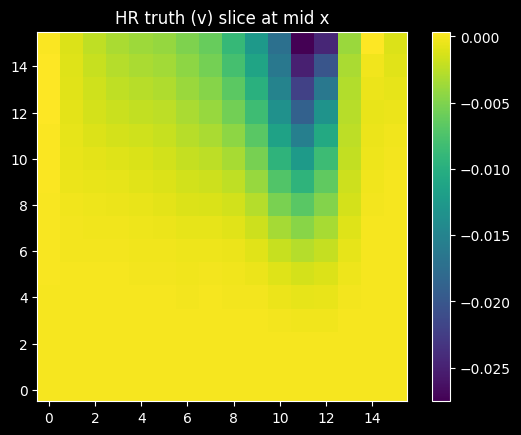

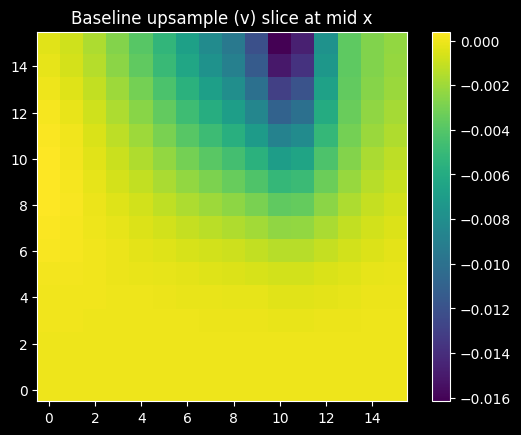

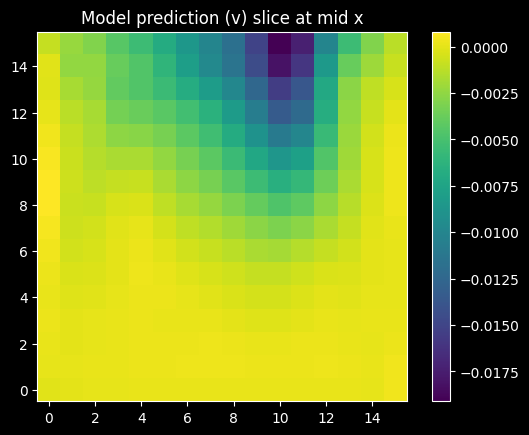

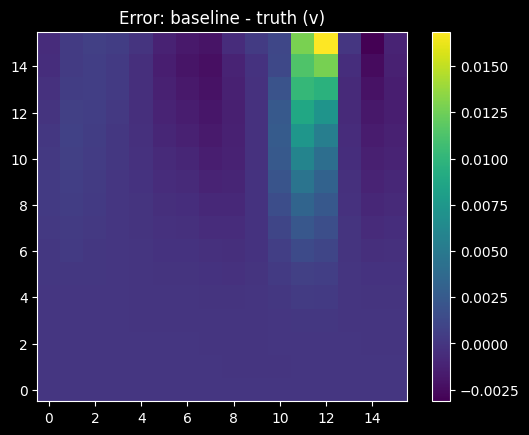

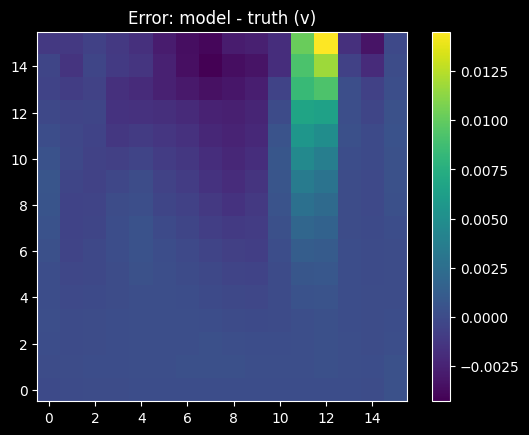

Per-slice MSE | baseline: 5.505781700776424e-06 | model: 4.73756153951399e-06


In [18]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import h5py
from pathlib import Path

# ----- load best checkpoint -----
ckpt = torch.load("sr3d_best.pt", map_location=device)
model.load_state_dict(ckpt["model_state"])
model.eval()

mu_ckpt = ckpt["mu"]
sigma_ckpt = ckpt["sigma"]

# ----- pick ONE validation sample -----
# We'll grab the first batch from val_loader
lr, hr = next(iter(val_loader))
lr = lr.to(device)
hr = hr.to(device)

with torch.no_grad():
    pred = model(lr)
    base = nn.Upsample(scale_factor=2, mode="trilinear", align_corners=False).to(device)(lr)

# take sample 0
lr0   = lr[0].cpu().numpy()
hr0   = hr[0].cpu().numpy()
base0 = base[0].cpu().numpy()
pred0 = pred[0].cpu().numpy()

# de-normalize back to physical-ish scale
hr0   = hr0 * sigma_ckpt + mu_ckpt
base0 = base0 * sigma_ckpt + mu_ckpt
pred0 = pred0 * sigma_ckpt + mu_ckpt

# choose component: 0=u, 1=v, 2=w
comp = 1  # start with v (usually more turbulent looking)
names = ["u", "v", "w"]
title_comp = names[comp]

# choose a mid-x slice: (C,D,H,W) => D corresponds to x in our indexing here
ix = hr0.shape[1] // 2

truth = hr0[comp, ix, :, :]      # (16,16)
bline = base0[comp, ix, :, :]
modelp = pred0[comp, ix, :, :]

err_base = bline - truth
err_model = modelp - truth

# ----- plot -----
plt.figure()
plt.imshow(truth, origin="lower")
plt.colorbar()
plt.title(f"HR truth ({title_comp}) slice at mid x")
plt.show()

plt.figure()
plt.imshow(bline, origin="lower")
plt.colorbar()
plt.title(f"Baseline upsample ({title_comp}) slice at mid x")
plt.show()

plt.figure()
plt.imshow(modelp, origin="lower")
plt.colorbar()
plt.title(f"Model prediction ({title_comp}) slice at mid x")
plt.show()

plt.figure()
plt.imshow(err_base, origin="lower")
plt.colorbar()
plt.title(f"Error: baseline - truth ({title_comp})")
plt.show()

plt.figure()
plt.imshow(err_model, origin="lower")
plt.colorbar()
plt.title(f"Error: model - truth ({title_comp})")
plt.show()

# print MSE numbers for this sample/component
mse_base = float(np.mean((err_base)**2))
mse_model = float(np.mean((err_model)**2))
print("Per-slice MSE | baseline:", mse_base, "| model:", mse_model)


In [19]:
import torch
import torch.nn as nn

@torch.no_grad()
def full_mse(loader):
    model.eval()
    up = nn.Upsample(scale_factor=2, mode="trilinear", align_corners=False).to(device)

    mse_model = 0.0
    mse_base  = 0.0
    n = 0

    for lr, hr in loader:
        lr = lr.to(device)
        hr = hr.to(device)

        pred = model(lr)
        base = up(lr)

        mse_model += torch.mean((pred - hr) ** 2).item() * lr.size(0)
        mse_base  += torch.mean((base - hr) ** 2).item() * lr.size(0)
        n += lr.size(0)

    return mse_model / n, mse_base / n

val_model_mse, val_base_mse = full_mse(val_loader
)
improve = (val_base_mse - val_model_mse) / val_base_mse * 100

print("Validation MSE (baseline):", val_base_mse)
print("Validation MSE (model):   ", val_model_mse)
print("Relative improvement (%): ", improve)


Validation MSE (baseline): 0.061085861176252365
Validation MSE (model):    0.054583873599767685
Relative improvement (%):  10.644013935932497


In [40]:
import torch

@torch.no_grad()
def full_mae(loader, model, device):
    """
    Computes MAE for:
      - baseline = trilinear upsample(LR)
      - model    = model(LR)
    Returns: (mae_model, mae_base)
    """
    model.eval()
    up = torch.nn.Upsample(scale_factor=2, mode="trilinear", align_corners=False).to(device)

    total_abs_model = 0.0
    total_abs_base  = 0.0
    total_count     = 0

    for lr, hr in loader:
        lr = lr.to(device)   # (B, 3, 8, 8, 8)
        hr = hr.to(device)   # (B, 3, 16,16,16)

        pred = model(lr)
        base = up(lr)

        total_abs_model += torch.sum(torch.abs(pred - hr)).item()
        total_abs_base  += torch.sum(torch.abs(base - hr)).item()
        total_count     += hr.numel()

    mae_model = total_abs_model / total_count
    mae_base  = total_abs_base  / total_count
    return mae_model, mae_base

val_model_mae, val_base_mae = full_mae(val_loader, model, device)

improve_mae = (val_base_mae - val_model_mae) / val_base_mae * 100

print("Validation MAE (baseline):", val_base_mae)
print("Validation MAE (model):   ", val_model_mae)
print("Relative improvement (%): ", improve_mae)


Validation MAE (baseline): 0.11531155308087666
Validation MAE (model):    0.11266724268595378
Relative improvement (%):  2.293187737284424


In [41]:
import numpy as np
import torch

# -------------------------------
# 1) Helper: divergence RMS
# div(u) = du/dx + dv/dy + dw/dz
# Lower is better if the flow should be close to incompressible.
# -------------------------------
def divergence_rms(vel_3d, xcoor, ycoor, zcoor, axis_order="ZYX"):
    """
    vel_3d: numpy array shaped (N, 3, Nz, Ny, Nx) OR (N, 3, Ny, Nz, Nx) etc.
            We'll assume your arrays are in (N, 3, Nz, Ny, Nx) when axis_order="ZYX".
    xcoor, ycoor, zcoor: 1D coordinate arrays (Nx, Ny, Nz)
    axis_order: "ZYX" means last 3 dims are (z, y, x).
    Returns: RMS(divergence) averaged over all samples and all grid points.
    """
    assert axis_order == "ZYX", "This helper is written for (z,y,x) ordering for now."

    # split velocity components
    u = vel_3d[:, 0]  # (N, Nz, Ny, Nx)
    v = vel_3d[:, 1]
    w = vel_3d[:, 2]

    # gradients: use coordinates so scaling is meaningful
    du_dx = np.gradient(u, xcoor, axis=3)  # x is last axis
    dv_dy = np.gradient(v, ycoor, axis=2)  # y is middle axis
    dw_dz = np.gradient(w, zcoor, axis=1)  # z is first axis

    div = du_dx + dv_dy + dw_dz
    return float(np.sqrt(np.mean(div**2)))


@torch.no_grad()
def collect_hr_base_pred(loader, model, device):
    """
    Collects HR, baseline(trilinear), and model predictions into numpy arrays.
    """
    model.eval()
    up = torch.nn.Upsample(scale_factor=2, mode="trilinear", align_corners=False).to(device)

    hr_list, base_list, pred_list = [], [], []

    for lr, hr in loader:
        lr = lr.to(device)
        hr = hr.to(device)

        pred = model(lr)
        base = up(lr)

        hr_list.append(hr.cpu().numpy())
        base_list.append(base.cpu().numpy())
        pred_list.append(pred.cpu().numpy())

    hr_np = np.concatenate(hr_list, axis=0)
    base_np = np.concatenate(base_list, axis=0)
    pred_np = np.concatenate(pred_list, axis=0)

    return hr_np, base_np, pred_np


# -------------------------------
# 2) Run the check on validation set
# -------------------------------
hr_np, base_np, pred_np = collect_hr_base_pred(val_loader, model, device)

# NOTE:
# Use the same axis order you already validated as correct earlier.
# You said your correct order is (Z,Y,X), so we use "ZYX" here.
div_hr   = divergence_rms(hr_np,   xcoor, ycoor, zcoor, axis_order="ZYX")
div_base = divergence_rms(base_np, xcoor, ycoor, zcoor, axis_order="ZYX")
div_ml   = divergence_rms(pred_np, xcoor, ycoor, zcoor, axis_order="ZYX")

print("\n=== Quick conclusion (accuracy vs physics) ===")
print(f"MSE/MAE: (see above)  -> ML looks better than trilinear on reconstruction error.")
print(f"Physics proxy (divergence RMS, lower is better):")
print(f"  HR truth : {div_hr:.6f}")
print(f"  Baseline : {div_base:.6f}")
print(f"  ML model : {div_ml:.6f}")

if div_ml <= div_base:
    print("✅ Good sign: ML is at least not worse than baseline on divergence.")
else:
    print("⚠️ Physics gap: ML has higher divergence than baseline -> not physics-constrained yet.")
    print("   This is why we say: 'Good MSE/MAE, but physics consistency is future work.'")



=== Quick conclusion (accuracy vs physics) ===
MSE/MAE: (see above)  -> ML looks better than trilinear on reconstruction error.
Physics proxy (divergence RMS, lower is better):
  HR truth : 77.550537
  Baseline : 112.907471
  ML model : 147.518326
⚠️ Physics gap: ML has higher divergence than baseline -> not physics-constrained yet.
   This is why we say: 'Good MSE/MAE, but physics consistency is future work.'
